In [1]:
import yfinance as yf
from yahoo_fin import stock_info

In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
TICKER = 'IBM'
DIV_PERIODS = 10

In [4]:
stock_basic_info = yf.Ticker(TICKER).info

In [5]:
stock_basic_info

{'zip': '10504',
 'sector': 'Technology',
 'fullTimeEmployees': 282100,
 'longBusinessSummary': "International Business Machines Corporation provides integrated solutions and services worldwide. The company operates through four business segments: Software, Consulting, Infrastructure, and Financing. The Software segment offers hybrid cloud platform and software solutions, such as Red Hat, an enterprise open-source solutions; software for business automation, AIOps and management, integration, and application servers; data and artificial intelligence solutions; and security software and services for threat, data, and identity. This segment also provides transaction processing software that supports clients' mission-critical and on-premise workloads in banking, airlines, and retail industries. The Consulting segment offers business transformation services, including strategy, business process design and operations, data and analytics, and system integration services; technology consultin

10년간 배당금 정보 가져 오기

In [6]:
end_date = datetime.now().strftime("%Y-%m-%d")
print("start date: " , end_date)
start_date = (datetime.now() - relativedelta(years=DIV_PERIODS)).strftime("%Y-%m-%d")
print("end date: ", start_date)

start date:  2022-12-14
end date:  2012-12-14


In [8]:
dividends = stock_info.get_dividends(TICKER, start_date=start_date, end_date=end_date)

In [9]:
dividends.head(3)

,dividend,ticker
2013-02-06,0.812620,IBM
2013-05-08,0.908222,IBM
2013-08-07,0.908222,IBM


In [10]:
dividends.tail(3)

,dividend,ticker
2022-05-09,1.65,IBM
2022-08-09,1.65,IBM
2022-11-09,1.65,IBM


10년간 주가 정보 가져오기

In [12]:
# Get the data
stock_data = yf.download(TICKER, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [13]:
stock_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-14,183.260040,184.894836,182.848953,183.326965,124.062294,4002937
2012-12-17,183.326965,185.382416,183.326965,185.105164,125.265633,3966850
2012-12-18,185.325043,187.304016,185.315491,187.084137,126.604858,4315691


In [14]:
stock_data.loc[dividends.index].head(3)

,Open,High,Low,Close,Adj Close,Volume
2013-02-06,191.577438,192.437866,190.783936,192.179733,130.600601,3790913
2013-05-08,194.015289,195.841293,193.604202,195.812622,133.693161,3767378
2013-08-07,181.261948,181.577438,179.780121,180.267685,123.694908,4081178


In [15]:
df_close_price = stock_data.loc[dividends.index]['Close']

In [16]:
df_close_price[:3]

2013-02-06    192.179733
2013-05-08    195.812622
2013-08-07    180.267685
Name: Close, dtype: float64

In [17]:
dividends['close'] = df_close_price

In [18]:
dividends.head(3)

,dividend,ticker,close
2013-02-06,0.812620,IBM,192.179733
2013-05-08,0.908222,IBM,195.812622
2013-08-07,0.908222,IBM,180.267685


In [19]:
dividends = dividends.drop('ticker', axis=1)

In [20]:
dividends.head(3)

,dividend,close
2013-02-06,0.812620,192.179733
2013-05-08,0.908222,195.812622
2013-08-07,0.908222,180.267685


In [43]:
div_freq = round(len(dividends.index)/DIV_PERIODS)

In [22]:
dividends['div yield'] = round(dividends['dividend']*div_freq / dividends['close'] * 100, 2)

In [23]:
dividends.head(3)

,dividend,close,div yield
2013-02-06,0.812620,192.179733,1.69
2013-05-08,0.908222,195.812622,1.86
2013-08-07,0.908222,180.267685,2.02


<AxesSubplot:>

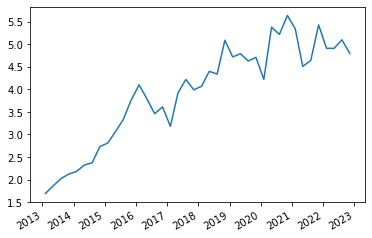

In [24]:
dividends['div yield'].plot()

In [25]:
div_min = min(dividends['div yield'])
div_max = max(dividends['div yield'])

In [26]:
div_min, div_max

(1.69, 5.64)

In [27]:
current_datetime = datetime.strptime(end_date, "%Y-%m-%d")

In [28]:
current_datetime

datetime.datetime(2022, 12, 14, 0, 0)

In [29]:
current_price = stock_data.iloc[-1]['Close']

In [30]:
current_price

150.57000732421875

In [31]:
last_dividend = dividends.iloc[-1]['dividend']
last_dividend

1.65

In [32]:
current_div_yield = round(last_dividend*4/current_price*100, 2)
current_div_yield

4.38

In [33]:
import matplotlib.pyplot as plt

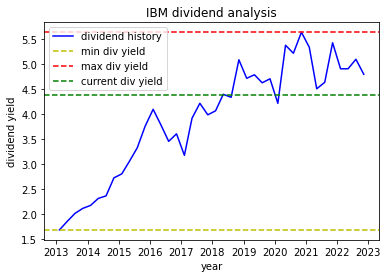

In [36]:
plt.plot(dividends['div yield'],  color='b', label = 'dividend history')
plt.axhline(y=div_min, color='y', linestyle='--', label='min div yield')
plt.axhline(y=div_max, color='r', linestyle='--', label='max div yield')
plt.axhline(y=current_div_yield, color='g', linestyle='--', label='current div yield')
plt.title(f'{TICKER} dividend analysis')
plt.xlabel('year')
plt.ylabel('dividend yield')
plt.legend()
plt.show()

In [39]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buysell_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    sell_score = 100 - buy_score
    return buy_score, sell_score

In [42]:
buy_score, sell_score = calculate_buysell_score(current_div_yield, div_min, div_max)
print(f'buy score = {buy_score}\nsell score = {sell_score}')

buy score = 68
sell score = 32
